In [1]:
import torch
import torch.nn as nn

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

In [4]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                                batch_size = 64,
                                                shuffle = True)

data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                               batch_size = 64,
                                               shuffle = True)

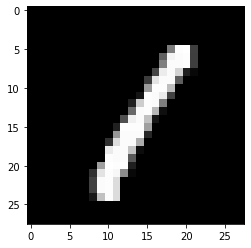

In [5]:
plt.imshow(data_loader_train.dataset[3][0][0].numpy(), cmap='gray')

In [6]:
raw_data = datasets.MNIST(root="./data/",
                           train = False)

In [7]:
import numpy as np

for i in range(6):
    display(raw_data[i][0])

In [8]:
conv1 = torch.nn.Conv2d(1,10,kernel_size=3,padding=1)

In [9]:
conv1

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [10]:
examples = enumerate(data_loader_train)
batch_idx, (example_data, example_targets) = next(examples)

In [11]:
example_data.shape

torch.Size([64, 1, 28, 28])

In [12]:
a1 = conv1(example_data)

In [13]:
maxpool2 = nn.MaxPool2d(kernel_size=3)

In [14]:
a2 = maxpool2(a1)

In [15]:
a1.shape

torch.Size([64, 10, 28, 28])

In [16]:
a2.shape

torch.Size([64, 10, 9, 9])

In [17]:
temp = torch.arange(24*24, dtype=float).reshape(1, 1, 24, 24)
maxpool2(temp)

tensor([[[[ 50.,  53.,  56.,  59.,  62.,  65.,  68.,  71.],
          [122., 125., 128., 131., 134., 137., 140., 143.],
          [194., 197., 200., 203., 206., 209., 212., 215.],
          [266., 269., 272., 275., 278., 281., 284., 287.],
          [338., 341., 344., 347., 350., 353., 356., 359.],
          [410., 413., 416., 419., 422., 425., 428., 431.],
          [482., 485., 488., 491., 494., 497., 500., 503.],
          [554., 557., 560., 563., 566., 569., 572., 575.]]]],
       dtype=torch.float64)

In [18]:
seq1 = nn.Sequential(
    nn.Conv2d(1,10,kernel_size=3,padding=1),
    nn.MaxPool2d(kernel_size=3),
    nn.ReLU()
)

seq2 = nn.Sequential(
    nn.Conv2d(10,20,kernel_size=3,padding=1),
    nn.MaxPool2d(kernel_size=3),
    nn.ReLU()
)
seq3 = nn.Sequential(
    nn.Linear(180, 50),
    nn.ReLU(),
    nn.Dropout2d(p=0.2),
)
seq4 = nn.Sequential(
    nn.Linear(50, 10),
    nn.ReLU(),
)

In [19]:
a2 = seq2(seq1(example_data))

In [20]:
a2.shape

torch.Size([64, 20, 3, 3])

In [21]:
a2 = a2.view(-1, 180)
a2.shape

torch.Size([64, 180])

In [22]:
a3 = seq3(a2)

In [23]:
a3.shape

torch.Size([64, 50])

In [24]:
a4 = seq4(a3)

In [25]:
a4.shape

torch.Size([64, 10])

In [26]:
predict = nn.Softmax(dim=1)

In [27]:
p = predict(a4)

In [28]:
p.shape

torch.Size([64, 10])

In [29]:
a4[0]

tensor([0.0000, 0.2438, 0.0000, 0.0000, 0.0000, 0.1142, 0.1772, 0.1074, 0.0425,
        0.0000], grad_fn=<SelectBackward>)

In [30]:
p[0]

tensor([0.0930, 0.1187, 0.0930, 0.0930, 0.0930, 0.1043, 0.1111, 0.1036, 0.0971,
        0.0930], grad_fn=<SelectBackward>)

In [31]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq1 = nn.Sequential(
            nn.Conv2d(1,10,kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=3),
            nn.ReLU()
        )
        self.seq2 = nn.Sequential(
            nn.Conv2d(10,20,kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=3),
            nn.ReLU()
        )
        self.seq3 = nn.Sequential(
            nn.Linear(180, 50),
            nn.ReLU(),
            nn.Dropout2d(p=0.2),
        )
        self.seq4 = nn.Sequential(
            nn.Linear(50, 10),
            nn.ReLU(),
        )
        
    
    def forward(self, x):
        x = self.seq1(x)
        x = self.seq2(x)
        x = x.view(-1, 180)
        x = self.seq3(x)
        x = self.seq4(x)
        return F.log_softmax(x, dim=1)

In [32]:
network = Net()

In [33]:
network

Net(
  (seq1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (seq2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (seq3): Sequential(
    (0): Linear(in_features=180, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout2d(p=0.2, inplace=False)
  )
  (seq4): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): ReLU()
  )
)

In [34]:
params = list(network.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([10, 1, 3, 3])


In [35]:
import torch.optim as optim


learning_rate = 0.01
momentum = 0.5

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [46]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(data_loader_train.dataset) for i in range(5)]

log_interval = 50

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(data_loader_train):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(data_loader_train.dataset),
                100. * batch_idx / len(data_loader_train), loss.item())
            )
            train_losses.append(loss.item())
            train_counter.append(
              (batch_idx*64) + ((epoch-1)*len(data_loader_train.dataset)))
            torch.save(network.state_dict(), './results/model.pth')
            torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [37]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(data_loader_test):
            output = network(data)
            test_loss += F.nll_loss(output, targets, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(targets.data.view_as(pred)).sum()
        test_loss /= len(data_loader_test.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(data_loader_test.dataset),
            100. * correct / len(data_loader_test.dataset))
        )

In [38]:
test()
for epoch in range(1, 5):
    train(epoch)
    test()

D:\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3116, Accuracy: 978/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291710
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.279982
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.282362
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.029812
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.869615
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.244363
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.044813
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.885305
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.844339
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.830250
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.515363
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.471510
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.370907
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.395980
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.340002
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.494726
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.329641
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.312492
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.281547

T

ValueError: x and y must be the same size

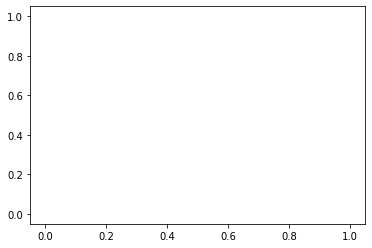

In [49]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig


In [55]:
with torch.no_grad():
    output = network(example_data)
example_data.shape

torch.Size([64, 1, 28, 28])

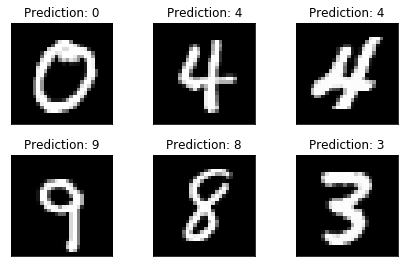

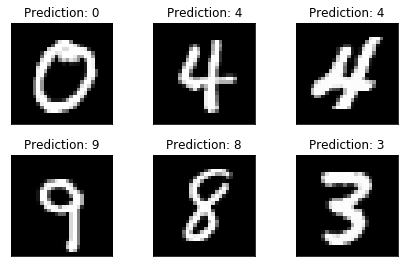

In [54]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig